In [1]:
#관련 패키지 설치
!pip install datasets

  Using cached datasets-2.19.2-py3-none-any.whl.metadata (19 kB)
  Using cached filelock-3.14.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pyarrow-16.1.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.0 kB)
  Using cached pyarrow_hotfix-0.6-py3-none-any.whl.metadata (3.6 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached xxhash-3.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached multiprocess-0.70.16-py310-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2024.3.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached aiohttp-3.9.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014

In [1]:
#관련 라이브러리 import
from datasets import load_dataset
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

/home/cslee/anaconda3/envs/llm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#신발 브랜드 분류용 이미지 데이터 로드
dataset = load_dataset("keremberke/shoe-classification",'full',split='train')

Generating test split: 100%|██████████████████████████████████████████████| 83/83 [00:00<00:00, 55170.72 examples/s]


In [3]:
dataset

Dataset({
    features: ['image_file_path', 'image', 'labels'],
    num_rows: 576
})

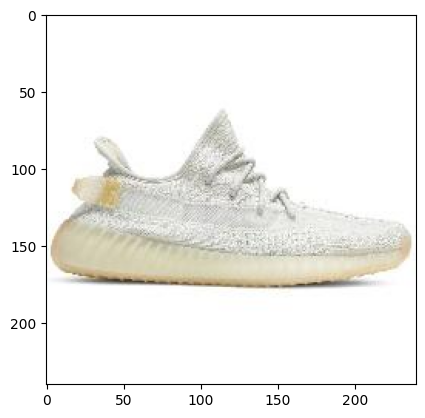

In [4]:
query_image = dataset[44]['image']
plt.imshow(query_image)
plt.show()

In [5]:
type(query_image)

PIL.JpegImagePlugin.JpegImageFile

In [6]:
query_image = np.array(query_image)

In [7]:
query_image.shape

(240, 240, 3)

In [9]:
# x,y 차원을 채널별 1개 차원으로 펼침
img_vector = query_image.reshape(1, -1, 3) 
img_vector.shape

(1, 57600, 3)

In [10]:
#변환된 벡터로부터 각 채널별(RGB) 벡터 추출
red_channel = img_vector[0, :, 0]
green_channel = img_vector[0, :, 1]
blue_channel = img_vector[0, :, 2]

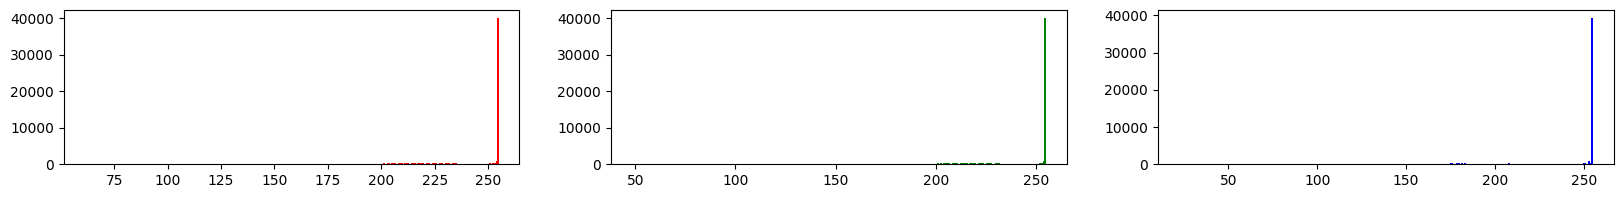

In [13]:
#히스토그램으로 나타내기
fig, axs = plt.subplots(1, 3, figsize=(20,2))
axs[0].hist(red_channel, bins=255, color='r')
axs[1].hist(green_channel, bins=255, color='g')
axs[2].hist(blue_channel, bins=255, color='b')
plt.show()

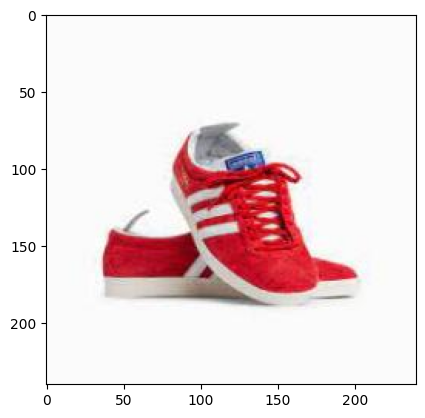

In [14]:
#다른 이미지
query_image = dataset[153]['image']
plt.imshow(query_image)
plt.show()

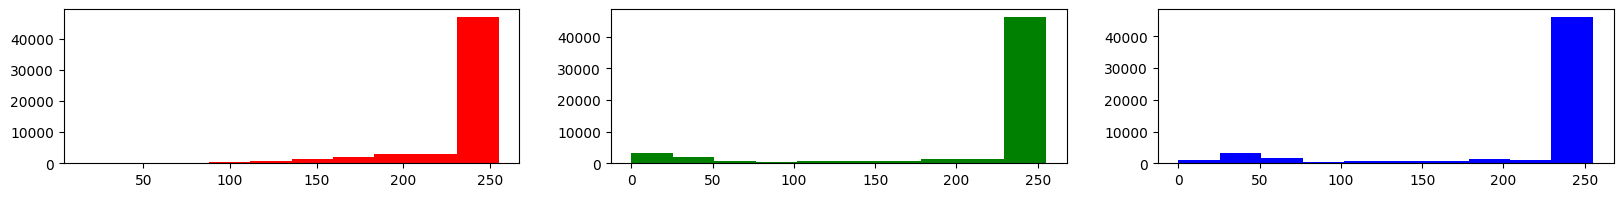

In [15]:
#동일하게 분포 나타내보기
query_image = np.array(query_image)
img_vector = query_image.reshape(1, -1, 3)
red_channel = img_vector[0, :, 0]
green_channel = img_vector[0, :, 1]
blue_channel = img_vector[0, :, 2]
fig, axs = plt.subplots(1, 3, figsize=(20, 2))
axs[0].hist(red_channel, bins=10, color='r')
axs[1].hist(green_channel, bins=10, color='g')
axs[2].hist(blue_channel, bins=10, color='b')
plt.show()

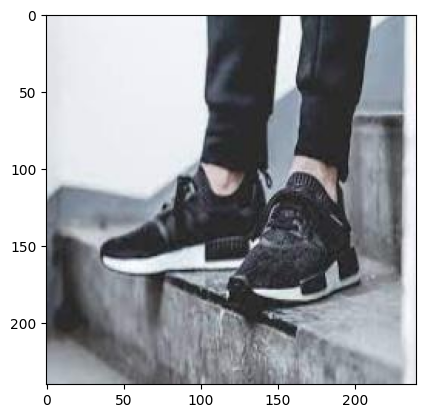

In [16]:
#마지막 이미지
query_image = dataset[141]['image']
plt.imshow(query_image)
plt.show()

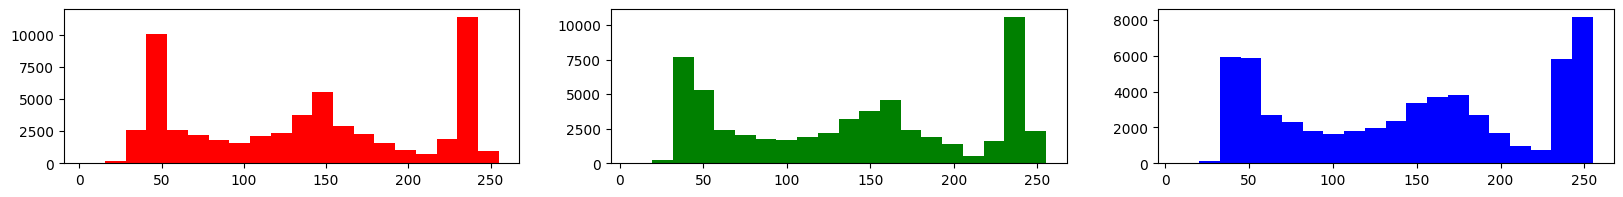

In [18]:
#마지막 이미지 분포 시각화
query_image = np.array(query_image)
img_vector = query_image.reshape(1, -1, 3)
red_channel = img_vector[0, :, 0]
green_channel = img_vector[0, :, 1]
blue_channel = img_vector[0, :, 2]
fig, axs = plt.subplots(1, 3, figsize=(20, 2))
axs[0].hist(red_channel, bins=20, color='r')
axs[1].hist(green_channel, bins=20, color='g')
axs[2].hist(blue_channel, bins=20, color='b')
plt.show()